In [2]:
# basic imports 
import numpy as np
import pandas as pd

# Plotting imports
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("neuroscience_articles_withcitations_with_stragglers.csv")
precut_len = len(data)
data = data.dropna(subset=['citation_doi', 'text', 'citation_date'])
print(str(precut_len - len(data)) + ' articles cut')

13 articles cut


In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'citation_abstract',
       'citation_author', 'citation_author_email',
       'citation_author_institution', 'citation_date', 'citation_doi',
       'citation_issn', 'citation_journal_abbrev', 'citation_journal_title',
       'citation_keywords', 'citation_language', 'citation_online_date',
       'citation_pages', 'citation_pdf_url', 'citation_publication_date',
       'citation_publisher', 'citation_title', 'citation_volume',
       'dc.identifier', 'description', 'img', 'keywords', 'text', 'title',
       'url', 'ID', 'num_citations'],
      dtype='object')

In [5]:
# Get length of all artice texts
text_lens = np.array([len(x) if isinstance(x,str) else np.nan for x in data['text']])


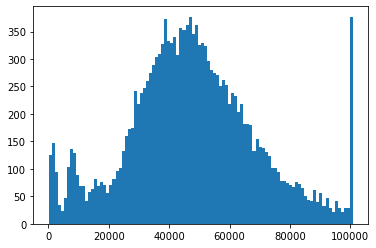

In [6]:
# plot hist fo text lengths
plot1 = plt.hist(text_lens[~np.isnan(text_lens)],100)

In [16]:
withrefs = np.array([True if '\r\n\r\nReferences\r\n\r\n' in x else False for x in data['text']])
print(np.shape(data))
print(sum(withrefs))

(16285, 30)
15470


In [22]:
data['text'][1]

"In this study, we explore the functional role of striatal cholinergic interneurons, hereinafter referred to as tonically active neurons (TANs), via computational modeling; specifically, we investigate the mechanistic relationship between TAN activity and dopamine variations and how changes in this relationship affect reinforcement learning in the striatum. TANs pause their tonic firing activity after excitatory stimuli from thalamic and cortical neurons in response to a sensory event or reward information. During the pause striatal dopamine concentration excursions are observed. However, functional interactions between the TAN pause and striatal dopamine release are poorly understood. Here we propose a TAN activity-dopamine relationship model and demonstrate that the TAN pause is likely a time window to gate phasic dopamine release and dopamine variations reciprocally modulate the TAN pause duration. Furthermore, this model is integrated into our previously published model of reward-b

## Helper Functions

In [23]:
def preprocess_article_text(txt, char_cutoff):
    ''' 
    inputs:
        txt: str - article text
        char_cutoff: int - number of characters for text to be considered
    '''
    
    assert isinstance(txt,str), 'txt input must be a string'
    
    # Make sure txt length is long enough to be a real article and make sure it has references
    if (len(txt) < char_cutoff) or ('\r\n\r\nReferences\r\n\r\n' not in txt):
        cleaned_text = np.nan
        num_references = np.nan
        return(cleaned_text, num_references)
    
    # Separate reference text from article text
    textrefs = txt.split('\r\n\r\nReferences\r\n\r\n')
    assert len(textrefs)==2, 'Splitting article text from references has failed'
    txt = textrefs[0]
    refs = textrefs[1]
    
    # Count number of references
    references = refs.split('\r\n\r\n')
    num_references = len(references)
    
    # Clean text
    cleaned_text = txt
    
    return(cleaned_text, num_references)

In [24]:
[cleaned_text, num_references] = preprocess_article_text(data['text'][3425], 20000)

In [25]:
num_references

4

In [26]:
cleaned_text

"Although the brain structures involved in integrating odorant and trigeminal stimuli are well-documented, there is still a need to clarify (1) how emotional response is represented in the human brain during cross-modal interaction between odors and trigeminal stimuli, and (2) whether the degree of congruency between the two types of stimuli influences these emotional responses and their neural processing. These questions were explored combining psychophysics, event-related potentials (ERP) and fMRI in the same group of 17 subjects under a “congruent condition” (intranasal carbon dioxide mixed with the smell of orange, a combination found in soda drinks, for example), and an “incongruent condition” (intranasal carbon dioxide mixed with the smell of rose, a combination not encountered in everyday life). Responses to the 3 constituent stimuli (carbon dioxide, orange, and rose) were also measured. Hedonic and intensity ratings were collected for all stimulations. The congruent bimodal sti

In [194]:
#def vectorized_isin(string, items, true_any):
#    ''' 
#    inputs:
#        string: str - string to check for items
#        items: list of strs - items to check for in string
#        true_any: bool - return true if any item occurs in string. Else return boolean np array
#    '''
#    
#    isin  = np.array([True if x in string else False for x in items])
#    
#    if true_any:
#        isin = any(isin)
#    
#    return(isin)

2. Extract features from each article that might corelate with article popularity
    - Author
    - Topic
    - journal 
    - number of authors
    - jargon/readability
    - length
        - length of each section (methods, results, intro, etc)
    - NLP of arousal/valence